<a href="https://colab.research.google.com/github/Vsanku01/Deep-Learning-Tuts/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
import tensorflow
print(tensorflow.__version__)

2.1.0


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.datasets import mnist

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
single_image = X_train[0]
single_image.shape

(28, 28)

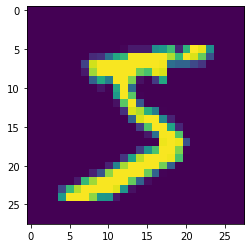

In [10]:
plt.imshow(single_image)

In [11]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
y_train
#If we pass the below values the model assumes that it is as continous values but it is multiclass classification problem.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train)

In [16]:
y_example.shape # One hot encoded the values from 0 to 9

(60000, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
# Encoding the test and training sets.
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [19]:
y_cat_test.shape

(10000, 10)

In [20]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Normalise the training images.

In [0]:
X_train = X_train / 255
X_test = X_test / 255

In [0]:
scaled_image = X_train[0]

In [0]:
# batch_size,width,heigth,color channel
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

Model Creation and Training

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model = Sequential()

#input_shape the shape of the image given to the CNN
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),strides=(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # pool size is generally half of kernel size.


model.add(Flatten())
# Flatten does change the image into 28 * 28 i.e 784 so select a value from 0 to 1000 for no of Dense layers
model.add(Dense(128,activation='relu'))

#Output Layer
# The Dense should have layers equal to the number of outputs
model.add(Dense(10,activation='softmax')) # softmax for multiclass problem

#Keras.io/metrics
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss') # As loss is given by the loss function defined above we use it to monitor

In [27]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 233us/sample - loss: 0.1422 - accuracy: 0.9572 - val_loss: 0.0570 - val_accuracy: 0.9808
Epoch 2/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0485 - accuracy: 0.9853 - val_loss: 0.0472 - val_accuracy: 0.9850
Epoch 3/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0456 - val_accuracy: 0.9850
Epoch 4/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0206 - accuracy: 0.9938 - val_loss: 0.0420 - val_accuracy: 0.9873
Epoch 5/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0383 - val_accuracy: 0.9879
Epoch 6/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0444 - val_accuracy: 0.9882
Epoch 7/10
60000/60000 [=========================

In [29]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.142235,0.957233,0.057004,0.9808
1,0.048465,0.985317,0.047190,0.9850
2,0.030100,0.990567,0.045619,0.9850
3,0.020556,0.993783,0.041990,0.9873
4,0.014155,0.995267,0.038294,0.9879
5,0.009953,0.996817,0.044446,0.9882
6,0.007649,0.997467,0.048669,0.9877
7,0.006142,0.998000,0.060298,0.9855
8,0.005653,0.998083,0.062440,0.9861
9,0.003934,0.998867,0.062365,0.9869


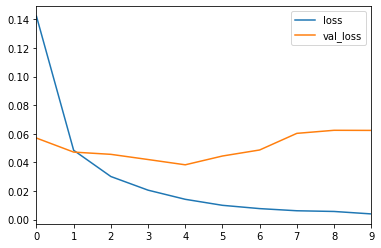

In [30]:
metrics[['loss','val_loss']].plot()

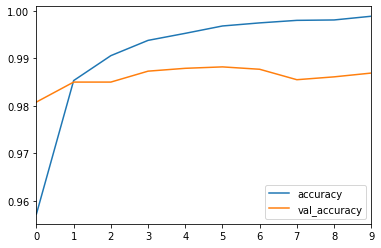

In [31]:
metrics[['accuracy','val_accuracy']].plot()

In [32]:
model.metrics_names

['loss', 'accuracy']

Model Evaluation

In [33]:
model.evaluate(X_test,y_cat_test)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.0624 - accuracy: 0.9869


[0.06236490431566585, 0.9869]

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
predictions = model.predict_classes(X_test) # Predict the classes

In [36]:
y_cat_test.shape

(10000, 10)

In [37]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

